## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
df = pd.read_csv('Reviews.csv')
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [3]:
df.shape

(568454, 10)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568454 entries, 0 to 568453
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Id                      568454 non-null  int64 
 1   ProductId               568454 non-null  object
 2   UserId                  568454 non-null  object
 3   ProfileName             568428 non-null  object
 4   HelpfulnessNumerator    568454 non-null  int64 
 5   HelpfulnessDenominator  568454 non-null  int64 
 6   Score                   568454 non-null  int64 
 7   Time                    568454 non-null  int64 
 8   Summary                 568427 non-null  object
 9   Text                    568454 non-null  object
dtypes: int64(5), object(5)
memory usage: 43.4+ MB


In [7]:
df.Summary.head()

0    Good Quality Dog Food
1        Not as Advertised
2    "Delight" says it all
3           Cough Medicine
4              Great taffy
Name: Summary, dtype: object

In [8]:
df.Text.head()

0    I have bought several of the Vitality canned d...
1    Product arrived labeled as Jumbo Salted Peanut...
2    This is a confection that has been around a fe...
3    If you are looking for the secret ingredient i...
4    Great taffy at a great price.  There was a wid...
Name: Text, dtype: object

## Text Preprocessing

In [10]:
!pip install textblob

In [12]:
from nltk.corpus import stopwords
from textblob import TextBlob

df['Text'] = df['Text'].apply(lambda x: " ".join(x.lower() for x in x.split()))


In [14]:
df['Text'] = df['Text'].str.replace(r'[^\w\s]', '') #lower case, remove stop words nd punctuation
df.Text.head(5)

0    i have bought several of the vitality canned d...
1    product arrived labeled as jumbo salted peanut...
2    this is a confection that has been around a fe...
3    if you are looking for the secret ingredient i...
4    great taffy at a great price. there was a wide...
Name: Text, dtype: object

In [15]:
string =" yoo the food was delicious"


In [17]:
print(string.replace("delicious", "yummy"))

 yoo the food was yummy


In [19]:
import nltk
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

## Removal of stopwords

In [20]:
stop=stopwords.words('english')
df['Text'] = df['Text'].apply(lambda x: " ".join( x for x in x.split() if x not in stop))
df.Text.head()

0    bought several vitality canned dog food produc...
1    product arrived labeled jumbo salted peanuts.....
2    confection around centuries. light, pillowy ci...
3    looking secret ingredient robitussin believe f...
4    great taffy great price. wide assortment yummy...
Name: Text, dtype: object

## Spelling Correction

In [ ]:
df['Text'] = df['Text'].apply(lambda x: str(TextBlob(x).correct()))
df.Text.head()

## Lemmatization

In [25]:
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')  # Sometimes also needed for lemmatization


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...


True

In [68]:
from textblob import Word

df['Text'] = df['Text'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))


### Look at the smmary Text using wordcloud

In [23]:
!pip install wordcloud

In [31]:
from wordcloud import WordCloud, STOPWORDS


In [32]:
df.columns

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

In [33]:
df.Score.value_counts()

Score
5    363122
4     80655
1     52268
3     42640
2     29769
Name: count, dtype: int64

In [36]:
import seaborn as sns

In [42]:
sns.countplot(data = df, x= 'Score')

<Axes: xlabel='Score', ylabel='count'>

In [43]:
reviews = df
reviews.dropna(inplace=True)

In [40]:
score_1 = reviews[reviews['Score'] == 1]
score_2 = reviews[reviews['Score'] == 2]
score_3 = reviews[reviews['Score'] == 3]
score_4 = reviews[reviews['Score'] == 4]
score_5 = reviews[reviews['Score'] == 5]

In [41]:
reviews_sample = pd.concat([score_1,score_2,score_3,score_4,score_5],axis=0)
reviews_sample.reset_index(drop = True, inplace= True)

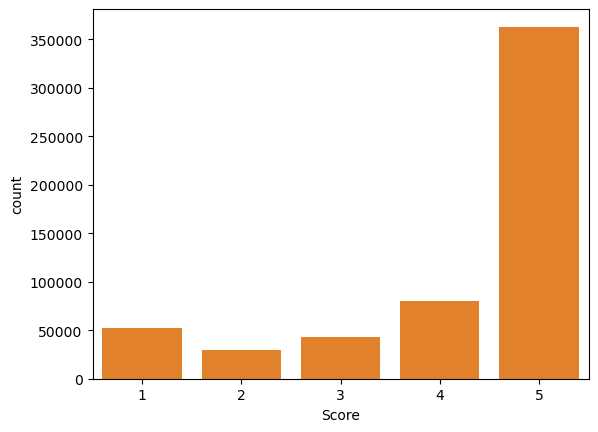

<Figure size 1000x1000 with 0 Axes>

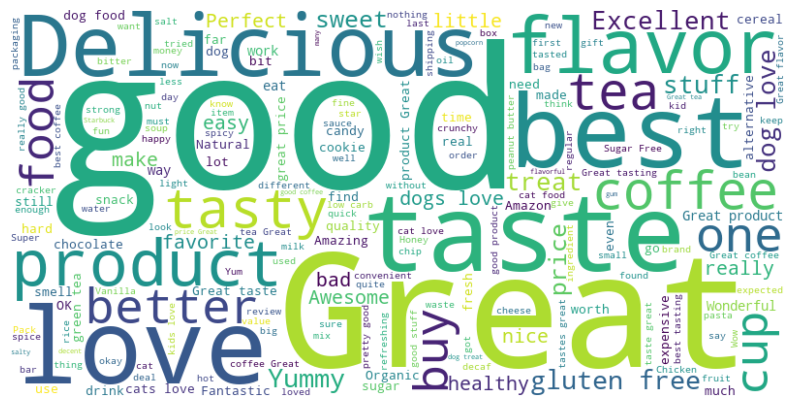

In [45]:
reviews_str = reviews_sample.Summary.str.cat()
wordcloud = WordCloud( width=800, height=400,background_color='white').generate(reviews_str)
plt.figure(figsize=(10,10))
plt.imshow(wordcloud,interpolation ='bilinear')
plt.axis("off")
plt.show()

In [47]:
negative_reviews = reviews_sample[reviews_sample['Score'].isin([1,2]) ]
positive_reviews = reviews_sample[reviews_sample['Score'].isin([4,5]) ]

negative_reviews_str = negative_reviews.Summary.str.cat()
positive_reviews_str = positive_reviews.Summary.str.cat()

## create wordcloud

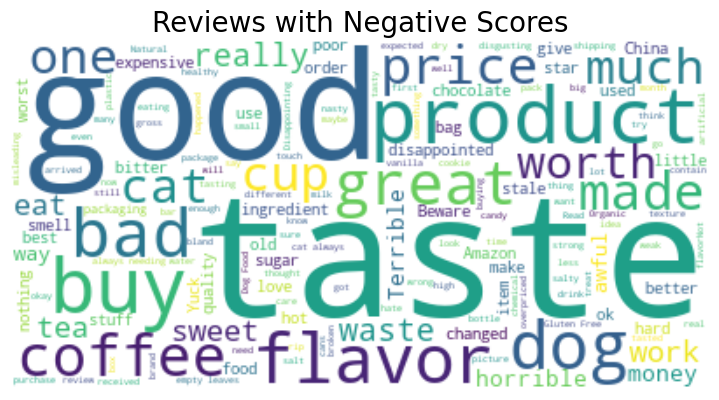

In [53]:
wordcloud_negative = WordCloud(background_color = 'white').generate(negative_reviews_str)
wordcloud_positive = WordCloud(background_color = 'black').generate(positive_reviews_str)

fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(211)
ax1.imshow(wordcloud_negative, interpolation ='bilinear')
ax1.axis("off")
ax1.set_title('Reviews with Negative Scores', fontsize = 20)
plt.show()

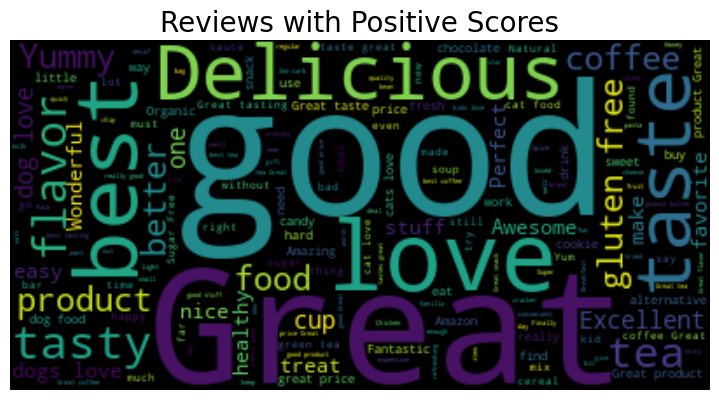

In [52]:
fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(211)
ax1.imshow(wordcloud_positive, interpolation ='bilinear')
ax1.axis("off")
ax1.set_title('Reviews with Positive Scores', fontsize = 20)
plt.show()

## Install vaderSentiment

In [54]:
!pip install vaderSentiment

In [58]:
import re
import os
import sys
import ast
plt.style.use('fivethirtyeight')

cp = sns.color_palette()
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [59]:
emptyline=[]
for row in df['Text']:
    vs=analyzer.polarity_scores(row)
    emptyline.append(vs)

df_sentiments = pd.DataFrame(emptyline)
df_sentiments.head()

,neg,neu,pos,compound
0,0.000,0.517,0.483,0.9413
1,0.129,0.762,0.110,-0.1027
2,0.123,0.608,0.268,0.8532
3,0.000,0.868,0.132,0.4404
4,0.000,0.369,0.631,0.9468


In [63]:
df_c = pd.concat([df.reset_index(drop = True), df_sentiments], axis =1)
df_c.head(3)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,neg,neu,pos,compound
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,bought several vitality canned dog food produc...,0.000,0.517,0.483,0.9413
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,product arrived labeled jumbo salted peanuts.....,0.129,0.762,0.110,-0.1027
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all","confection around centuries. light, pillowy ci...",0.123,0.608,0.268,0.8532


In [65]:
df_c['sentiment'] = np.where(df_c['compound'] >=0, 'Positive', 'Negative')
df_c.head(5)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,neg,neu,pos,compound,sentiment
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,bought several vitality canned dog food produc...,0.000,0.517,0.483,0.9413,Positive
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,product arrived labeled jumbo salted peanuts.....,0.129,0.762,0.110,-0.1027,Negative
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all","confection around centuries. light, pillowy ci...",0.123,0.608,0.268,0.8532,Positive
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,looking secret ingredient robitussin believe f...,0.000,0.868,0.132,0.4404,Positive
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,great taffy great price. wide assortment yummy...,0.000,0.369,0.631,0.9468,Positive


## RESULTS

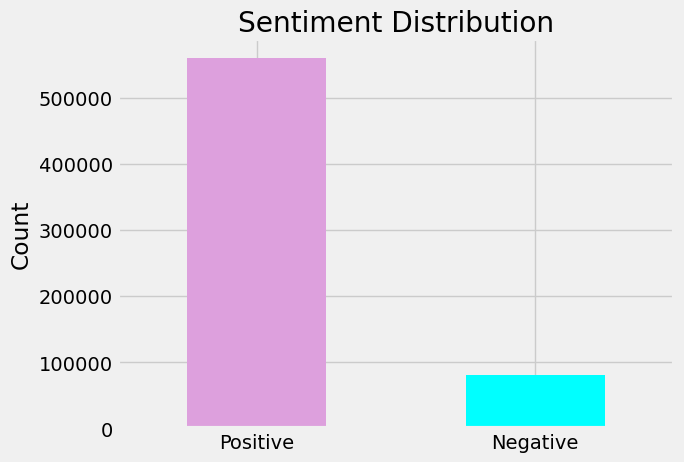

In [67]:
# Example data (replace with your actual DataFrame)
# result = df_c['Sentiment'].value_counts()
result = pd.Series({'Positive': 560000, 'Negative': 80000})

# Plotting
result.plot(kind='bar', rot=0, color=['plum', 'cyan'])

# Add Y-axis label and title if needed
plt.ylabel("Count")
plt.title("Sentiment Distribution")

# Show the plot
plt.show()
